In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
n = 5000

#set up synthetic data
X = np.random.normal(size=[n, 3])
y = X[:,0] + 2*X[:,1] + 3*X[:,2] + np.random.normal(size=[n])/3
y = y[:,np.newaxis]

X_val, y_val = X[-100:], y[-100:]
X, y = X[:-100], y[:-100]

In [3]:
X.shape, y.shape

((4900, 3), (4900, 1))

In [4]:
#build tensorflow model

X_ph = tf.placeholder(tf.float32) # we will put data here
y_ph = tf.placeholder(tf.float32) # and here

W = tf.Variable(tf.random_normal([3,1]), name='weight') # define model parameters and their initialization

y_hat = tf.matmul(X_ph, W) # prediction

loss = tf.reduce_mean( (y_hat - y_ph)**2 )

In [5]:
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss) # compute gradients and apply them

In [6]:
sess = tf.Session() # create model variable manager

In [7]:
initializer = tf.global_variables_initializer() # create parameter initializer

In [8]:
sess.run(initializer) # initialize model variables

In [9]:
train_op = [loss, train_op]

In [10]:
def run_train(X, y):
    return sess.run(train_op, feed_dict={X_ph:X, y_ph:y})[0] #run train_op and return loss

In [11]:
ix = np.arange(len(X))
losses_train = []
losses_val = []

with sess.as_default():
    for _ in range(200):
        sample = np.random.choice(ix, size=100, replace=True) #sample 100 random data points
        X_, y_ = X[sample], y[sample]
        
        #track train and validation losses:
        losses_train.append(run_train(X_, y_))
        
        losses_val.append(loss.eval(feed_dict={X_ph: X_val, y_ph: y_val}))

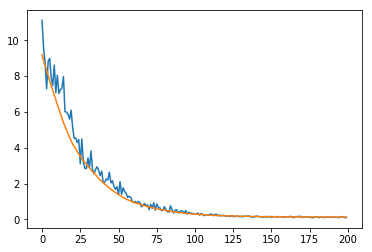

In [12]:
plt.plot(range(len(losses_train)), losses_train)
plt.plot(range(len(losses_val)), losses_val)

In [13]:
with sess.as_default():
    print(W.eval())

[[ 0.96856284]
 [ 1.9541111 ]
 [ 2.95948386]]
